# Feature Selection by filter methods: categorical input, categorical output

# Mutual_info_classif()

W tym przypadku stosuje sie metody statystyczne:
Zawsze w zbiorze danych mamy zmienne ciągłe i zmienne dyskretne. 
Ta procedura dotyczy relacji zmiennych niezależnych dyskretnych w stosunku do zmiennych wynikowych dyskretnych.
Poniżej pokazuję analizę zmiennych dyskretnych gdy wartość wynikowa jest dyskretna.


## Przygotowanie danych dyskretnych do procedury

In [1]:
import pandas as pd

df = pd.read_csv('/home/wojciech/Pulpit/1/kaggletrain.csv',sep=',',nrows=1000000)

print()
print(df.shape)
print()
print(df.columns)


(891, 13)

Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


### Wybieramy same zmienne dyskretne
Ponieważ robimy test danych dyskretnych z danymi dyskretnymi, w zbiorze do badań muszą być same zmienne dyskretne typu 'object'.
Poniższy kod wyrzuca wszystkie zmienne niezależne identyfikowane przez Pandas jako ciągłe. Trzeba to zweryfikować i ewentualnie zamienić na format dyskretny.
Format 'object' jest najbardziej oszczędny z formatów pod względem zajętości pamięci. 

In [2]:
import numpy as np

continuous_vars = df.describe().columns
df[continuous_vars].agg(['nunique','dtypes','min','max','median'])

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
nunique,891,891,2,3,88,7,7,248
dtypes,int64,int64,int64,int64,float64,int64,int64,float64
min,0,1,0,1,0.42,0,0,0
max,890,891,1,3,80,8,6,512.329
median,445,446,0,3,28,0,0,14.4542


### Zamieniamy wykryte zmienne dyskretne na format 'obiect'

In [3]:
df['Survived'] = df['Survived'].astype(object)
df['Pclass'] = df['Pclass'].astype(object)
df['SibSp'] = df['SibSp'].astype(object)
df['Parch'] = df['Parch'].astype(object)


#### Ze zmiennej Age mogę zrobić zmienną dyskretną

In [4]:
Ewa = ['dziecko', 'młody','średni','starszy','stary']

df['Age2'] = pd.qcut(df['Age'],5, labels=Ewa)
df['Age2'] = df['Age2'].astype('object')

In [5]:
df[['Age','Age2']].sample(3)

,Age,Age2
167,45.0,stary
602,NaN,NaN
773,NaN,NaN


Jeszcze raz sprawdzamy co mogło sie zawieruszyć

In [6]:
import numpy as np
continuous_vars = df.describe().columns
df[continuous_vars].agg(['nunique','dtypes','min','max','median'])

,Unnamed: 0,PassengerId,Age,Fare
nunique,891,891,88,248
dtypes,int64,int64,float64,float64
min,0,1,0.42,0
max,890,891,80,512.329
median,445,446,28,14.4542


## Sprawdzam zmienne kategoryczne

In [7]:
categorical_vars = df.describe(include=["object"]).columns

import numpy as np

df[categorical_vars].agg(['nunique','dtypes','min','max','median'])

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Age2
nunique,2,3,891,2,7,7,681,147,3,5
dtypes,object,object,object,object,object,object,object,object,object,object
min,0,1,"Abbing, Mr. Anthony",female,0,0,110152,NaN,NaN,NaN
max,1,3,"van Melkebeke, Mr. Philemon",male,8,6,WE/P 5735,NaN,NaN,NaN
median,0,3,NaN,NaN,0,0,NaN,NaN,NaN,NaN


## Sprawdzam i likwiduje puste rekordy w zmiennych dyskretnych

In [8]:
df[categorical_vars].isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Ticket        0
Cabin       687
Embarked      2
Age2        177
dtype: int64

### Usuwam niepotrzbne kolumny

In [9]:
del df['Cabin']
del df['Name']
del df['Ticket']

In [10]:
categorical_vars = df.describe(include=["object"]).columns
df[categorical_vars].isnull().sum()

Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Embarked      2
Age2        177
dtype: int64

In [11]:
print(df.shape)
df=df.dropna(how='any')
print(df.shape)
df[categorical_vars].isnull().sum()


(891, 11)
(712, 11)


Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    0
Age2        0
dtype: int64

## Wydzielam zbiór zmiennych dyskretnych 
## Na ostatnim miejscu ma być zmienna wynikowa y

In [12]:
#del df['id']
categorical_vars

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age2'], dtype='object')

In [13]:
categorical_vars = ['Pclass','Sex','SibSp','Parch','Embarked','Age2','Survived']

In [14]:

print(df.info(memory_usage='deep'))
df[categorical_vars].head(3)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
Unnamed: 0     712 non-null int64
PassengerId    712 non-null int64
Survived       712 non-null object
Pclass         712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null object
Parch          712 non-null object
Fare           712 non-null float64
Embarked       712 non-null object
Age2           712 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 284.4 KB
None


,Pclass,Sex,SibSp,Parch,Embarked,Age2,Survived
0,3,male,1,0,S,młody,0
1,1,female,1,0,C,starszy,1
2,3,female,0,0,S,średni,1


## Coding of discrete variables

In [15]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

df2 = df[categorical_vars].apply(LabelEncoder().fit_transform)
df2.head(4)

,Pclass,Sex,SibSp,Parch,Embarked,Age2,Survived
0,2,1,1,0,2,1,0
1,0,0,1,0,0,2,1
2,2,0,0,0,2,4,1
3,0,0,1,0,2,2,1


## Tworzę array z dataframe

In [16]:
## tworzę array z dataframe
dataset = df2.values
dataset[:3]

array([[2, 1, 1, 0, 2, 1, 0],
       [0, 0, 1, 0, 0, 2, 1],
       [2, 0, 0, 0, 2, 4, 1]])

## Dziele dane na zmienne opisujące i zmienną wynikową

In [17]:
X = dataset[:, :-1]
y = dataset[:,-1]
y[:25]

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0])

## Dzielimy dane na zbiór szkoleniowy i testowy

In [18]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (477, 6) (477,)
Test (235, 6) (235,)


In [19]:
X_train[:5]

array([[2, 1, 0, 0, 0, 4],
       [0, 0, 1, 0, 2, 2],
       [1, 0, 0, 0, 2, 4],
       [2, 0, 1, 1, 2, 0],
       [2, 1, 0, 0, 2, 0]])

In [20]:
y_train[:35]

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0])

# Feature Selection by Chi-Squared

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

def select_features_CH2(X_train, y_train, X_test):
    CH2 = SelectKBest(score_func=chi2, k=4)
    CH2.fit(X_train, y_train)
    X_train_CH2 = CH2.transform(X_train)
    X_test_CH2 = CH2.transform(X_test)
    return X_train_CH2, X_test_CH2, CH2

In [22]:
import time
start_time = time.time() ## pomiar czasu: start pomiaru czasu
print(time.ctime())

X_train_CH2, X_test_CH2, CH2 = select_features_CH2(X_train, y_train, X_test)

print('Time to complete the task')
print('minutes: ',
(time.time() - start_time)/60) ## koniec pomiaru czasu

Thu Mar 26 11:06:19 2020
Time to complete the task
minutes:  4.166364669799805e-05


### Wydrukowanie wyników selekcji Chi-Squared (największa wartość to najlepsza wartość)

In [23]:
CH2

SelectKBest(k=4, score_func=<function chi2 at 0x7f7cfd0af170>)

In [24]:
df2.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age2', 'Survived'], dtype='object')

In [25]:
for i in range(len(CH2.scores_)):
    print('Feature %d: %f' % (i, CH2.scores_[i]))

Feature 0: 35.246035
Feature 1: 47.804273
Feature 2: 0.612330
Feature 3: 5.163853
Feature 4: 5.452485
Feature 5: 0.016795


In [26]:
importance_CH2 = np.round(CH2.scores_, decimals=3)
importance_CH2

KOT_CH2 = dict(zip(df2, importance_CH2))
KOT_CH2_sorted_keys = sorted(KOT_CH2, key=KOT_CH2.get, reverse=True)

for r in KOT_CH2_sorted_keys:
    print (r, KOT_CH2[r])

Sex 47.804
Pclass 35.246
Embarked 5.452
Parch 5.164
SibSp 0.612
Age2 0.017


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(list(KOT_CH2.keys()), list(KOT_CH2.values()))

plt.title('Chi-Squared Feature Selection')
plt.ylabel('variance')
plt.xlabel('independent variables')

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

## Regresja logistyczna dla Chi-Squared

In [28]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report

CH2_model = LogisticRegression(solver='lbfgs')
CH2_model.fit(X_train_CH2, y_train)
# evaluate the model
yCH2 = CH2_model.predict(X_test_CH2)
# evaluate predictions
accuracy = accuracy_score(y_test, yCH2)
print("Recall Test data:   ", np.round(recall_score(y_test, CH2_model.predict(X_test_CH2)), decimals=4))
print("Precision Test data:", np.round(precision_score(y_test, CH2_model.predict(X_test_CH2)), decimals=4))
auc_CH2 = metrics.roc_auc_score(y_test, yCH2)
print('Accuracy:            %.2f' % (accuracy*100))
print('auc:                ',auc_CH2)

Recall Test data:    0.7188
Precision Test data: 0.7263
Accuracy:            77.45
auc:                 0.7658498201438849


 ## Model połaczony
 wyraźnie widać, że obie statystyki podają inne wartości, wspólnie wskazują na 3-4 zmienne. Bierzemy po dwie zmiuenne

In [29]:
df2.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age2', 'Survived'], dtype='object')

In [30]:
df3 = df2[['Pclass', 'Sex','Survived']]
df3.head(4)

,Pclass,Sex,Survived
0,2,1,0
1,0,0,1
2,2,0,1
3,0,0,1


In [31]:
## tworzę array z dataframe
dataset = df3.values
dataset[:3]

array([[2, 1, 0],
       [0, 0, 1],
       [2, 0, 1]])

In [32]:
X = dataset[:, :-1]
y = dataset[:,-1]
y[:25]

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0])

In [33]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (477, 2) (477,)
Test (235, 2) (235,)


In [34]:
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

Parameteres = {'C': np.power(10.0, np.arange(-3, 3))}
LR = LogisticRegression(warm_start = True)
LR_Grid = GridSearchCV(LR, param_grid = Parameteres, scoring = 'roc_auc', n_jobs = -1, cv=2)

LR_Grid.fit(X_train, y_train) 
y_pred_LRC = LR_Grid.predict(X_test)

/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Recall Training data:      0.6562
Precision Training data:   0.7683
----------------------------------------------------------------------
Recall Test data:          0.7188
Precision Test data:       0.7263
----------------------------------------------------------------------
Confusion Matrix Test data
[[113  26]
 [ 27  69]]
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       139
           1       0.73      0.72      0.72        96

    accuracy                           0.77       235
   macro avg       0.77      0.77      0.77       235
weighted avg       0.77      0.77      0.77       235

auc 0.7658498201438849


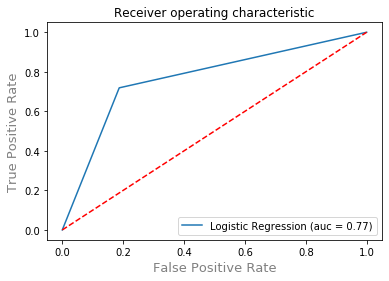

In [35]:
# ocena modelu
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report

print("Recall Training data:     ", np.round(recall_score(y_train, LR_Grid.predict(X_train)), decimals=4))
print("Precision Training data:  ", np.round(precision_score(y_train, LR_Grid.predict(X_train)), decimals=4))
print("----------------------------------------------------------------------")
print("Recall Test data:         ", np.round(recall_score(y_test, LR_Grid.predict(X_test)), decimals=4)) 
print("Precision Test data:      ", np.round(precision_score(y_test, LR_Grid.predict(X_test)), decimals=4))
print("----------------------------------------------------------------------")
print("Confusion Matrix Test data")
print(confusion_matrix(y_test, LR_Grid.predict(X_test)))
print("----------------------------------------------------------------------")
print(classification_report(y_test, LR_Grid.predict(X_test)))

y_pred_proba = LR_Grid.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_LRC)
auc = metrics.roc_auc_score(y_test, y_pred_LRC)
plt.plot(fpr, tpr, label='Logistic Regression (auc = %0.2f)' % auc)
plt.xlabel('False Positive Rate',color='grey', fontsize = 13)
plt.ylabel('True Positive Rate',color='grey', fontsize = 13)
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')

print('auc',auc)
plt.show()